In [1]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizing the dataset (scaling pixel values to the range 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Splitting a validation set from the training data
x_val = x_train[-12000:]
y_val = y_train[-12000:]
x_train = x_train[:-12000]
y_train = y_train[:-12000]

# Flattening input data for dense layers
input_shape = (28, 28)
x_train = x_train.reshape(-1, np.prod(input_shape))
x_val = x_val.reshape(-1, np.prod(input_shape))
x_test = x_test.reshape(-1, np.prod(input_shape))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Function to create models with different regularization techniques
def create_model(dropout_rate=0.0, l1_reg=0.0, l2_reg=0.0):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(784,),
              kernel_regularizer=l1(l1_reg) if l1_reg else l2(l2_reg)),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [4]:
# Creating models with different regularization techniques
models = {
    "Baseline (No Regularization)": create_model(),
    "L2 Regularization (0.01)": create_model(l2_reg=0.01),
    "Dropout (Rate 0.5)": create_model(dropout_rate=0.5)
}

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Training each model and storing the history
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    histories[name] = model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=128,
        validation_data=(x_val, y_val),
        verbose=2
    )

Training Baseline (No Regularization)...
Epoch 1/10
375/375 - 4s - 10ms/step - accuracy: 0.8129 - loss: 0.5320 - val_accuracy: 0.8512 - val_loss: 0.4176
Epoch 2/10
375/375 - 5s - 14ms/step - accuracy: 0.8623 - loss: 0.3804 - val_accuracy: 0.8652 - val_loss: 0.3737
Epoch 3/10
375/375 - 3s - 8ms/step - accuracy: 0.8771 - loss: 0.3371 - val_accuracy: 0.8754 - val_loss: 0.3442
Epoch 4/10
375/375 - 2s - 7ms/step - accuracy: 0.8860 - loss: 0.3089 - val_accuracy: 0.8696 - val_loss: 0.3557
Epoch 5/10
375/375 - 3s - 7ms/step - accuracy: 0.8913 - loss: 0.2904 - val_accuracy: 0.8828 - val_loss: 0.3177
Epoch 6/10
375/375 - 2s - 7ms/step - accuracy: 0.8975 - loss: 0.2738 - val_accuracy: 0.8848 - val_loss: 0.3277
Epoch 7/10
375/375 - 4s - 10ms/step - accuracy: 0.9027 - loss: 0.2623 - val_accuracy: 0.8872 - val_loss: 0.3105
Epoch 8/10
375/375 - 4s - 10ms/step - accuracy: 0.9068 - loss: 0.2490 - val_accuracy: 0.8923 - val_loss: 0.3033
Epoch 9/10
375/375 - 3s - 7ms/step - accuracy: 0.9112 - loss: 0.237

In [6]:
# Evaluating models on the test set
for name, model in models.items():
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{name} -> Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


Baseline (No Regularization) -> Test Accuracy: 0.8761, Test Loss: 0.3747
L2 Regularization (0.01) -> Test Accuracy: 0.8551, Test Loss: 0.4767
Dropout (Rate 0.5) -> Test Accuracy: 0.8690, Test Loss: 0.3585


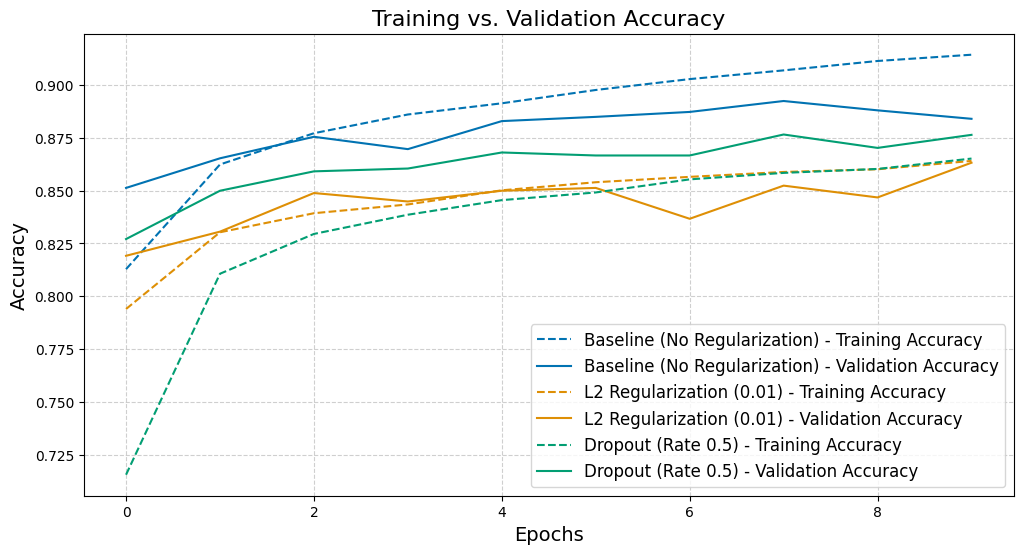

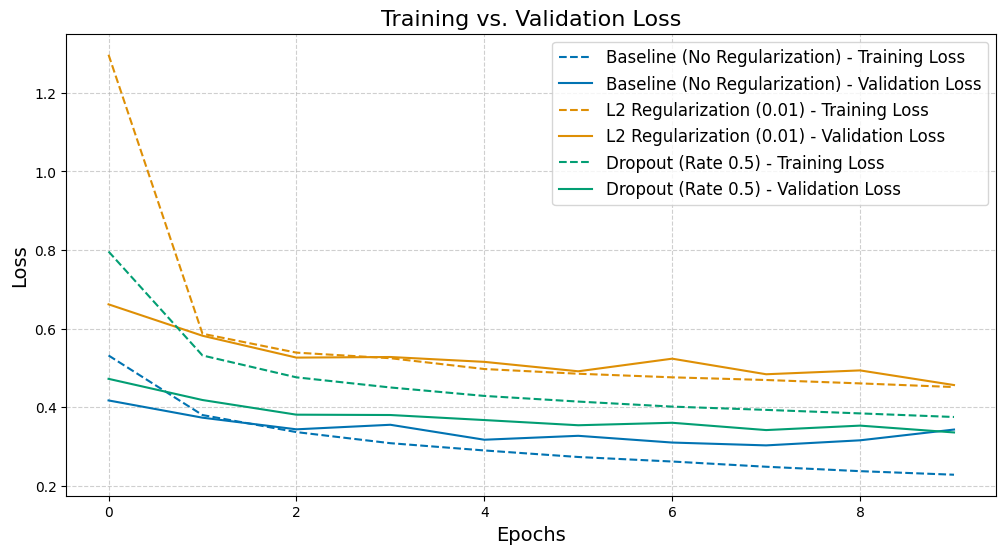

In [7]:
import seaborn as sns
from matplotlib import cm

sns.set_palette("colorblind")
colors = sns.color_palette("colorblind", len(histories))

# Plotting Training vs. Validation Accuracy for all models
plt.figure(figsize=(12, 6))
for i, (name, history) in enumerate(histories.items()):
    plt.plot(history.history['accuracy'], linestyle='--', color=colors[i], label=f"{name} - Training Accuracy")
    plt.plot(history.history['val_accuracy'], linestyle='-', color=colors[i], label=f"{name} - Validation Accuracy")
plt.title('Training vs. Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plotting Training vs. Validation Loss for all models
plt.figure(figsize=(12, 6))
for i, (name, history) in enumerate(histories.items()):
    plt.plot(history.history['loss'], linestyle='--', color=colors[i], label=f"{name} - Training Loss")
    plt.plot(history.history['val_loss'], linestyle='-', color=colors[i], label=f"{name} - Validation Loss")
plt.title('Training vs. Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



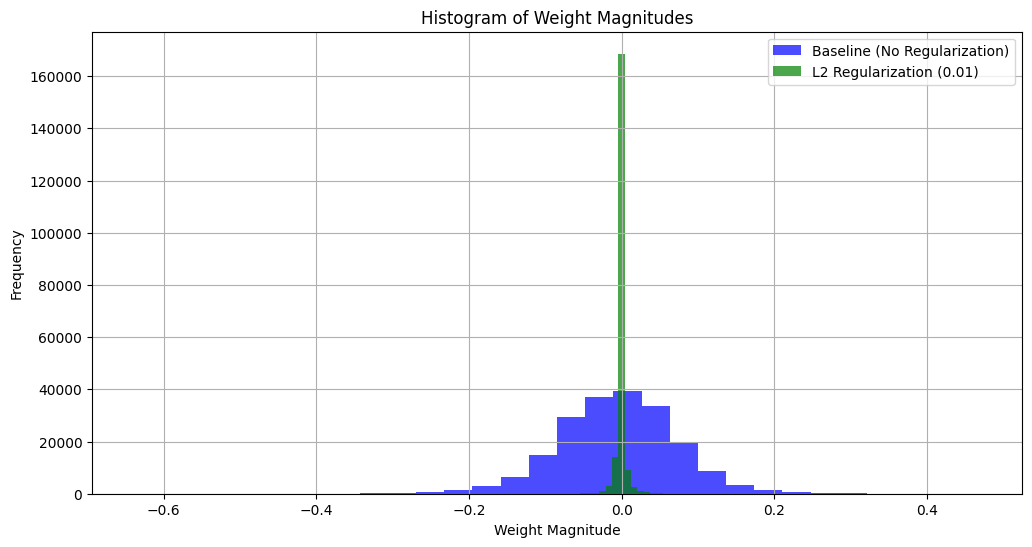

In [8]:
# Extracting weights from the L2-regularized model and baseline model
baseline_weights = models["Baseline (No Regularization)"].get_weights()[0].flatten()
l2_weights = models["L2 Regularization (0.01)"].get_weights()[0].flatten()

# Plotting histograms of weight magnitudes
plt.figure(figsize=(12, 6))
plt.hist(baseline_weights, bins=30, alpha=0.7, label='Baseline (No Regularization)', color='blue')
plt.hist(l2_weights, bins=30, alpha=0.7, label='L2 Regularization (0.01)', color='green')
plt.title('Histogram of Weight Magnitudes')
plt.xlabel('Weight Magnitude')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
